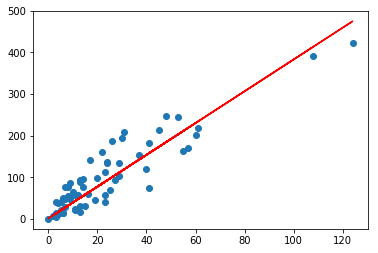

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("data/sweden.data", '\t')
data.head()

x = data["X"].as_matrix().reshape(-1, 1)
Y = data["Y"]
temp = []
for i in Y:
    temp.append(float(i.replace(',','.')))
y = np.array(temp).reshape(-1,1)

def cost(theta0,theta1,x,y):#构造参数函数  
    J=0  
    m=len(x)  
    for  i in range(m):  
        h = theta1 * x[i] + theta0  
        J += (h-y[i])**2  
    J /= (2*m)  
    return J  

def partil_cost_theta0(theta0, theta1, x, y):
    h = theta0 + theta1 * x
    diff = (h - y)
    partil = diff.sum()/ (x.shape[0])
    return partil

def partil_cost_theta1(theta0, theta1, x, y):
    h = theta0 + theta1 * x
    diff = (h - y) * x
    partil = diff.sum()/ (x.shape[0])

    return partil


theta0s=[]  
theta1s=[]  
costs=[] 

def gradient_descent(x, y, alpha=0.001, theta0=0,theta1=0):
    max_epoch = 100
    counter = 0    
    c = cost(theta0,theta1,x, y)
    
    costs = [c]  
    threshhold = 0.000001#低于门限的值认为收敛  
    cprev = c + 10  
    theta0s=[theta0]  
    theta1s=[theta1]  
    
    while((np.abs(cprev - c) > threshhold) and (counter < max_epoch)):
        cprev = c
        
        update0 = alpha * partil_cost_theta0(theta0,theta1, x, y)
        update1 = alpha * partil_cost_theta1(theta0,theta1, x, y)
        
        theta0 -= update0
        theta1 -= update1
        
        c = cost(theta0,theta1,x,y)    
        counter +=1 
    
    return (theta0,theta1)

plt.scatter(x,y)
theta0, theta1 = gradient_descent(x, y)
p_y = theta0 + theta1 * x
plt.plot(x, p_y, 'r')
plt.show()